In [15]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/resources/chest_x_rays'

In [3]:
os.path.join?

Signature: os.path.join(a, *p)
Docstring:
Join two or more pathname components, inserting '/' as needed.
If any component is an absolute path, all previous path components
will be discarded.  An empty last part will result in a path that
ends with a separator.
File:      /opt/anaconda3/lib/python3.6/posixpath.py
Type:      function


In [4]:
data_path = './chest_xray'

In [5]:
import glob

In [6]:
class_names = ['PNEUMONIA', 'NORMAL']

In [7]:
pneumonia_train_path = os.path.join(data_path+'/train', class_names[0], '*')

In [12]:
pneumonia_train_path

'./chest_xray/train/PNEUMONIA/*'

In [10]:
pneumonia_train = glob.glob(pneumonia_train_path)

In [14]:
pneumonia_train[:5]

['./chest_xray/train/PNEUMONIA/person63_bacteria_306.jpeg',
 './chest_xray/train/PNEUMONIA/person1438_bacteria_3721.jpeg',
 './chest_xray/train/PNEUMONIA/person755_bacteria_2659.jpeg',
 './chest_xray/train/PNEUMONIA/person478_virus_975.jpeg',
 './chest_xray/train/PNEUMONIA/person661_bacteria_2553.jpeg']

In [18]:
from skimage import io

/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


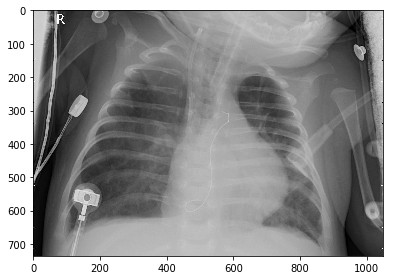

In [20]:
sample_pn_im = io.imread(pneumonia_train[0])
io.imshow(sample_pn_im)

- similarily like above lets store all the normal image titles in a list.
- Repeat the same process for test and validation datasets

In [21]:
normal_train_path = os.path.join(data_path+'/train', class_names[1], '*')
normal_train = glob.glob(normal_train_path)

In [22]:
normal_train[:5]

['./chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg',
 './chest_xray/train/NORMAL/NORMAL2-IM-1056-0001.jpeg',
 './chest_xray/train/NORMAL/IM-0427-0001.jpeg',
 './chest_xray/train/NORMAL/NORMAL2-IM-1260-0001.jpeg',
 './chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg']

In [29]:
sample_normal_im = io.imread(normal_train[0])

- Lets repeat the same process for validation and test dataset

In [23]:
pneumonia_val_path = os.path.join(data_path+'/val', class_names[0], '*')
pneumonia_val = glob.glob(pneumonia_val_path)

normal_val_path = os.path.join(data_path+'/val', class_names[1], '*')
normal_val = glob.glob(normal_val_path)

In [24]:
pneumonia_val[:5]

['./chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg',
 './chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg',
 './chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg',
 './chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg',
 './chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg']

In [25]:
normal_val[:5]

['./chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg',
 './chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg',
 './chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',
 './chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg',
 './chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg']

- Lets do it for test images too

In [26]:
pneumonia_test_path = os.path.join(data_path+'/test', class_names[0], '*')
pneumonia_test = glob.glob(pneumonia_test_path)

normal_test_path = os.path.join(data_path+'/test', class_names[1], '*')
normal_test = glob.glob(normal_test_path)

In [27]:
pneumonia_test[:5]

['./chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg',
 './chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg',
 './chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg',
 './chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg',
 './chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg']

In [28]:
normal_test[:5]

['./chest_xray/test/NORMAL/IM-0031-0001.jpeg',
 './chest_xray/test/NORMAL/IM-0025-0001.jpeg',
 './chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg',
 './chest_xray/test/NORMAL/NORMAL2-IM-0102-0001.jpeg',
 './chest_xray/test/NORMAL/NORMAL2-IM-0229-0001.jpeg']

- Lets visualize the pneumonia and normal chest image from train dataset, validation, and test data.
- Also lets print the sizes of the images.

In [34]:
sample_pn_val_im = io.imread(pneumonia_val[0])
sample_normal_val_im = io.imread(normal_val[0])
sample_pn_test_im = io.imread(pneumonia_test[0])
sample_normal_test_im = io.imread(normal_test[0])

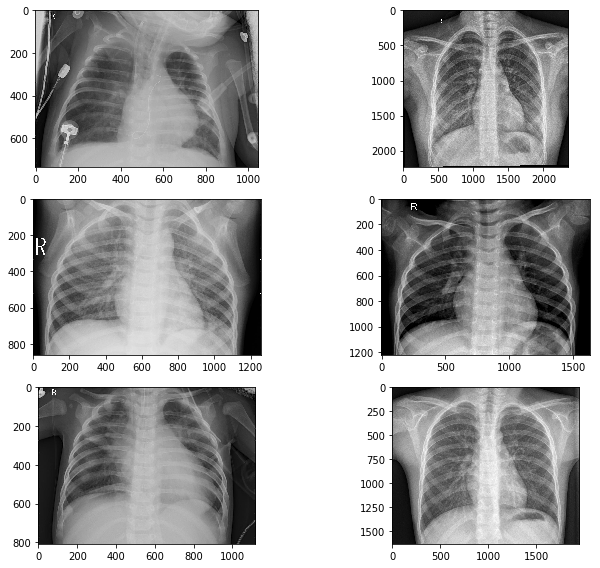

In [37]:
fig, ax = plt.subplots(3, 2)#, sharey=True)
fig.set_figwidth(10)
fig.set_figheight(8)
ax[0, 0].imshow(sample_pn_im, cmap='gray');
ax[0, 1].imshow(sample_normal_im, cmap='gray');
ax[1, 0].imshow(sample_pn_val_im, cmap='gray');
ax[1, 1].imshow(sample_normal_val_im, cmap='gray');
ax[2, 0].imshow(sample_pn_test_im, cmap='gray');
ax[2, 1].imshow(sample_normal_test_im, cmap='gray');

plt.tight_layout()

- Looks like not all the images in the train valiation and test data are in same size.

In [38]:
# lets look at there shapes
print(sample_pn_im.shape)
print(sample_normal_im.shape)
print(sample_pn_val_im.shape)
print(sample_normal_val_im.shape)
print(sample_pn_test_im.shape)
print(sample_normal_test_im.shape)

(736, 1048)
(2234, 2359)
(864, 1256)
(1225, 1632)
(808, 1120)
(1632, 1949)


- As we can see from above image shapes, not all images belong to same shape.